<a href="https://colab.research.google.com/github/mohyunyang/MyStudy/blob/master/ML_Pandas_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - 데이터 준비

In [19]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# csv 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)
df.head()

# 컬럼이름지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
df.head()

# Python 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)  # 숫자를 조정하면 ''' 으로 보이던 것이 전체가 보이게 가능
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


# 2 - 데이터 탐색

In [22]:
# 데이터 자료형 확인
print(df.info()) # Dtype 을 보면 어떤 것이 실수형인지 정수형인지 자료형지 알 수 있음
print('\n')

# 데이터 통계 요약 정보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [29]:
# horsepower 컬럼의 자료형을 변경 (문자열 -> 숫자)
print(df['horsepower'].unique()) # 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)    # '?' 를 np.nan 으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float')    # 문자열을 실수형으로 변환

print(df.describe())
print('\n')
print(df.info()) # 문자열이 실수형으로 바뀜을 확인

[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193. 100. 105. 175. 153. 180. 110.
  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92. 145.
 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.  52.
  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152. 102.
 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138. 135.
 142.  77.  62. 132.  84.  64.  74. 116.  82.]


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    

# 3 - 속성 선택

In [30]:
# 특성 선택
ndf = df[['mpg','cylinders','horsepower','weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


단순회귀분석

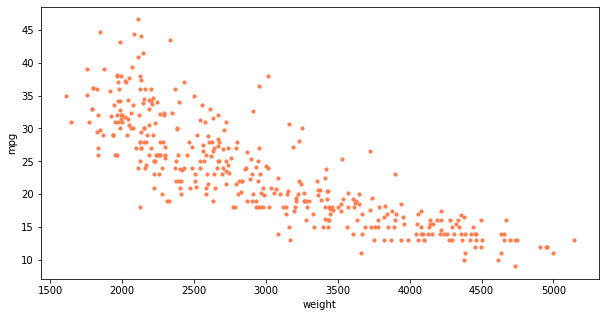

In [36]:
# y = mpg(연비) 와 다른 x(변수) 간의 선형관계를 산점도그래프로 확인
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))  # c 는 컬러, s 는 점크기
plt.show()
plt.close()

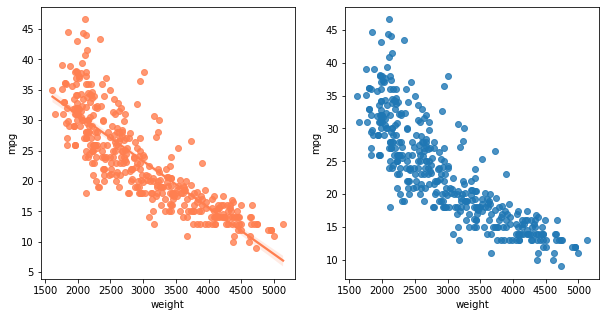

In [48]:
# seaborn 으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)      # 1행 2열 에서 첫번째
ax2 = fig.add_subplot(1,2,2)      # 1행 2열 에서 두번째
sns.regplot(x='weight', y='mpg', data=ndf, color='coral', ax=ax1)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  # fit_reg = False 를 직선이 사라짐
plt.show()
plt.close()

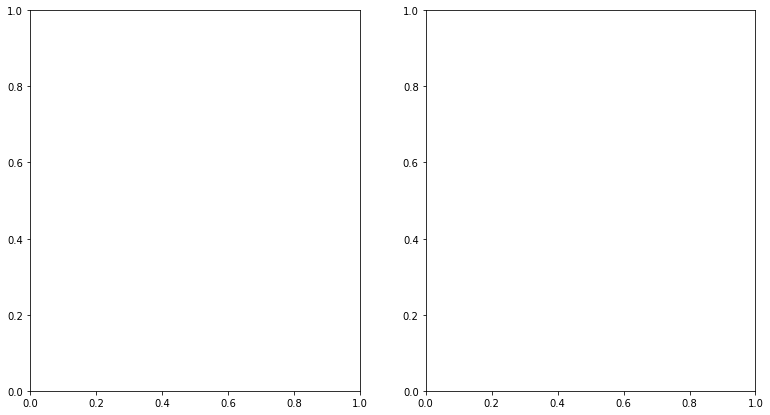

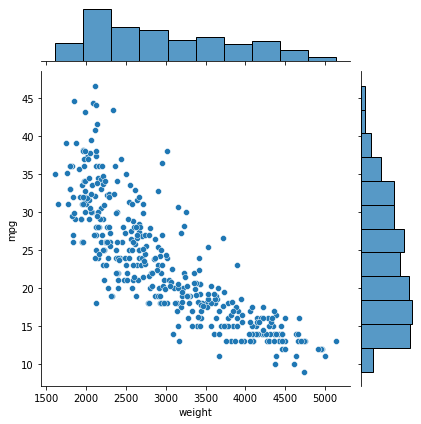

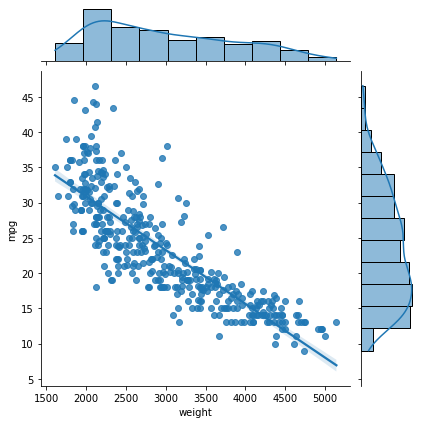

In [54]:
fig = plt.figure(figsize=(13,7))
ax3 = fig.add_subplot(1,2,1)      
ax4 = fig.add_subplot(1,2,2)  # 왜 안댐?

# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf, ax=ax3)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf, ax=ax4)
plt.show()
plt.close()

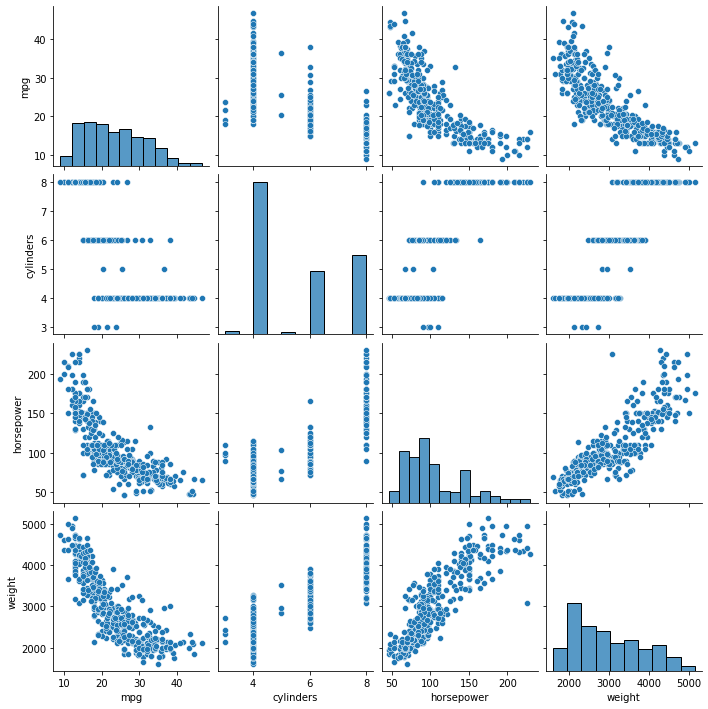

In [56]:
# seaborn pairplot 두 변수 간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

# 4 - 훈련/검증 데이터 분할

In [64]:
# 특성 선택
x = ndf[['weight']] # 왜 [[]]?
y = ndf['mpg'] # 왜 []?

# train, test로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)

print('train data 개수:', len(x_train))
print('test data 개수:', len(x_test))

train data 개수: 274
test data 개수: 118


# 5 - 모형 학습 및 검증

In [65]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train_data를 가지고 모형 학습
lr.fit(x_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(x_test, y_test)
print(r_square)

0.6822458558299322


In [68]:
# 회귀식의 기울기
print('기울기 a:', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편:', lr.intercept_)

기울기 a: [-0.00775343]


y절편: 46.7103662572801


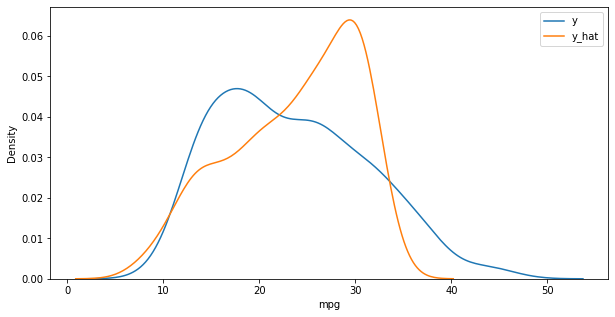

In [69]:
# 모형에 전체 x 데이터를 입력하여 예측한 값 y_hat을 실제 값 y의 비교
y_hat = lr.predict(x)  # y_hat 은 예측값

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label='y')                   # 실제 값 y
ax2 = sns.kdeplot(y_hat,label='y_hat', ax=ax1)    # 모델이 예측한 y(y_hat)
plt.legend()
plt.show()

실제 값은 왼쪽으로 편향되있고 예측값은 반대로 오른쪽으로 편중되있는 경향을 보인다. 모형의 오차를 줄일 필요가 있어보인다. 앞에서 그린 산점도를 보면 직선보단 곡선이 적합해보이므로 이럴 경우 비선형 회귀분석을 통해 모형의 정확도를 높일 수 있다

# 다항 회귀 분석

In [72]:
print('훈련데이터:', x_train.shape)
print('검증데이터:', x_test.shape)

훈련데이터: (274, 1)
검증데이터: (118, 1)


In [76]:
# 비선형회귀분석 모형 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 다항식 변환
poly = PolynomialFeatures(degree=2)         # 2차항 적용
x_train_poly = poly.fit_transform(x_train)  # x_tarin 데이터를 2차항으로 변형

print('원데이터:', x_train.shape)
print('2차항 변형 데이터:', x_train_poly.shape)

원데이터: (274, 1)
2차항 변형 데이터: (274, 3)


In [77]:
# train data를 가지고 모형학습
pr = LinearRegression()
pr.fit(x_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수계산
x_test_poly = poly.fit_transform(x_test)   # x_test 데이터를 2차항 변형
r_square = pr.score(x_test_poly, y_test)
print(r_square)

0.7087009262975481


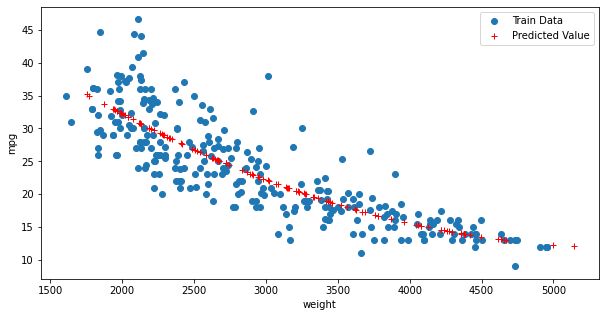

In [79]:
# train data 의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(x_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_train, y_train, 'o', label='Train Data')
ax.plot(x_test, y_hat_test, 'r+', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

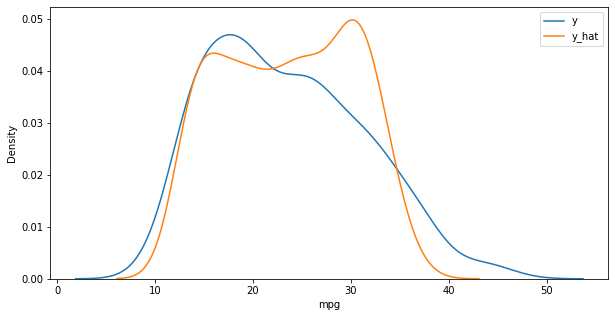

In [81]:
# 모형에 전체 x 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
x_ploy = poly.fit_transform(x)
y_hat = pr.predict(x_ploy)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [84]:
# 속성(변수) 선택
x = ndf[['cylinders','horsepower','weight']]
y = ndf['mpg']

# train data와 test data로 구분
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.3, random_state=10)

print('훈련데이터:',x_train.shape)
print('테스트데이터:',x_test.shape)

훈련데이터: (274, 3)
테스트데이터: (118, 3)


In [86]:
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형학습
lr.fit(x_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
r_square = lr.score(x_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print(lr.coef_)

# 회귀식의 절편
print(lr.intercept_)

0.6939048496695599


[-0.60691288 -0.03714088 -0.00522268]
46.414351269634025


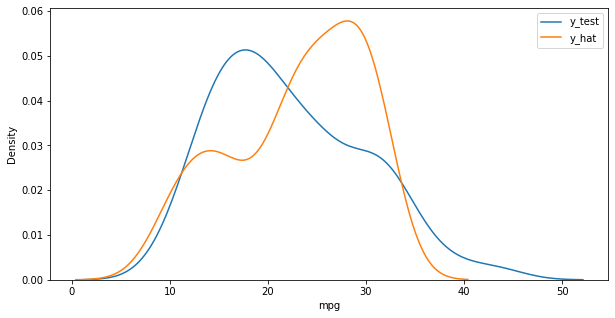

In [87]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(x_test)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

-------------------


# 분류

In [96]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

pd.set_option('display.max_columns', 15)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [101]:
rdf = df.drop(['deck', 'embark_town'], axis=1)
print(rdf.columns)
print('\n')
print(rdf.columns.values)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype='object')


['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [102]:
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))

714


In [108]:
# embarked 열의 Nan 값을 승선도시 중 가장 많이 등장한 값으로 치환
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')
print(rdf.describe())

rdf['embarked'].fillna(most_freq, inplace=True)

S


          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000

속성 선택

In [109]:
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [110]:
# 원핫 인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


In [112]:
x = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]
y = ndf['survived']

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)  # 정규화() 를 한번에

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)


print('train data 개수:', x_train.shape)
print('test data 개수:', x_test.shape)

train data 개수: (499, 9)
test data 개수: (215, 9)


-------------

# 학습 및 검증

## KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)   # train 세트로 훈련하고

y_hat = knn.predict(x_test)  # target 값이 없는 test 세트를 생존인지 아닌지를 예측하고 그 값을 y_hat 넣어라

print(y_hat[0:10])  # test 세트로 예측한 값과
print(y_test.values[0:10]) # 실제 y_test, test세트의 target값과 일치하는지 확인

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [119]:
# 모델 성능 평가
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

[[111  14]
 [ 24  66]]


In [120]:
# 모델 성능 평가
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       125
           1       0.82      0.73      0.78        90

    accuracy                           0.82       215
   macro avg       0.82      0.81      0.82       215
weighted avg       0.82      0.82      0.82       215



## SVM

In [122]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

pd.set_option('display.max_columns', 15)

rdf = df.drop(['deck', 'embark_town'], axis=1)
print(rdf.columns)
print('\n')
print(rdf.columns.values)

rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))

# embarked 열의 Nan 값을 승선도시 중 가장 많이 등장한 값으로 치환
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)

ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

x = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]
y = ndf['survived']

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)  # 정규화() 를 한번에

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype='object')


['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']
714
S


   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


In [124]:
from sklearn import svm

# 모형 객체 생성
svm_model = svm.SVC(kernel='rbf')

# train_data를 가지고 모형학습
svm_model.fit(x_train, y_train)

# test data를 가지고 y_hat 예측(분류)
y_hat = svm_model.predict(x_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [126]:
# 모형 성능 평가 - confusion Matrix 계산
from sklearn import metrics
svm_matrix = metrics. confusion_matrix(y_test, y_hat)
print(svm_matrix)

# 모델 성능 평가 - 평가 지표 계산
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



## Decision Tree

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin',
              'normal_nucleoli', 'misoses', 'class']

pd.set_option('display.max_columns', 15)
print(df.head())

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  misoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


In [129]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   misoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


In [132]:
print(df['bare_nuclei'].unique())
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

print(df.describe())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     misoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.

In [138]:
from sklearn import model_selection
# 속성 변수 선택
x = df[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin',
              'normal_nucleoli', 'misoses']]
y = df['class']

# 설명 변수 데이터 정규화
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

# 구분
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.3, random_state=10
)

print('train data 개수:', x_train.shape)
print('test data 개수:', x_test.shape)

train data 개수: (478, 9)
test data 개수: (205, 9)


In [140]:
from sklearn import tree

# 모형객체 생성
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# train data를 가지고 모형학습
tree_model.fit(x_train, y_train)

# test data를 가지고 y_hat 예측
y_hat = tree_model.predict(x_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [141]:
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)

# 성능평가
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)


[[127   4]
 [  2  72]]
              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



## K-Means

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

print(df.head)
print('\n')

print(df.info())
print('\n')

print(df.describe())

<bound method NDFrame.head of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4  

In [145]:
# 특성 선택
x = df.iloc[:,:]
print(x[:5])
print('\n')

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

print(x[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [147]:
from sklearn import cluster

kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형학습
kmeans.fit(x)

# 예측군집
cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

# 예측결과 데이터프레임에 추가하기
df['cluster'] = cluster_label
print(df.head())

[3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 1 3 1 1 3 3 3 1 1 3 1 1 1 1 1 1 3 1
 3 3 1 1 1 3 3 3 3 3 2 3 3 1 1 3 3 1 1 2 3 1 1 3 2 3 3 1 2 1 3 1 1 1 1 1 3
 3 1 1 3 1 1 1 3 3 1 3 2 2 1 1 1 1 1 2 1 3 1 3 1 1 1 3 3 3 1 1 1 3 3 3 3 1
 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 3 3 1 3 3 3 1 1 3 3 3 3 1 1 1 3 3 1 3 1 3 1 1 1 1 1 1 1 4 1
 1 1 1 3 3 1 1 1 3 1 1 0 3 0 0 3 3 0 0 0 3 0 0 0 3 0 2 0 0 3 0 3 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 3 0 3 0 0 0 0 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 3
 1 3 3 1 3 3 3 3 3 3 3 1 1 3 1 1 3 1 1 3 1 1 1 3 1 1 1 1 1 4 1 1 1 1 1 3 1
 2 0 3 1 1 1 1 3 3 1 3 1 1 3 3 1 3 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1
 3 1 1 3 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
 3 3 1 1 1 1 1 1 3 3 1 3 1 1 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

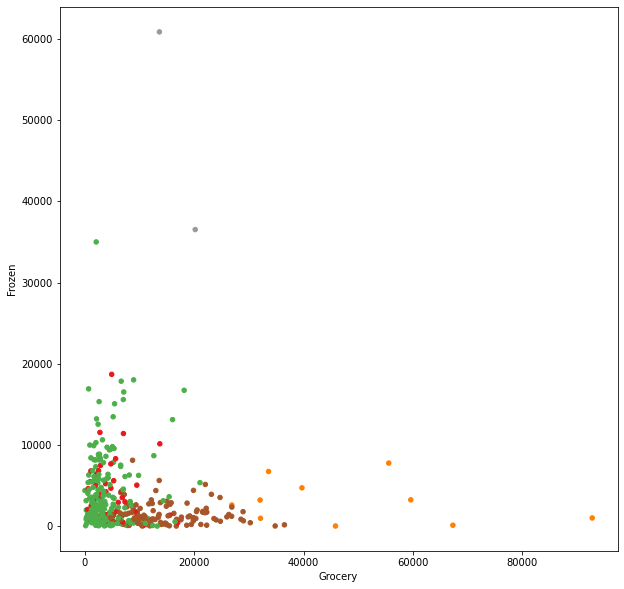

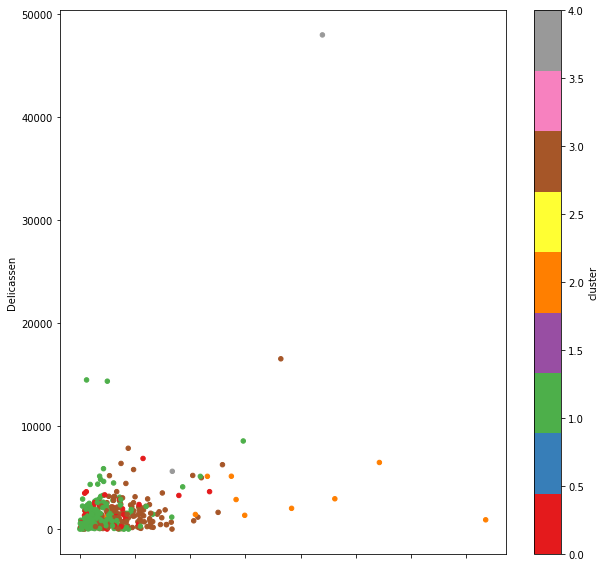

In [155]:
# 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='cluster', cmap='Set1', colorbar=False, figsize=(10,10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='cluster', cmap='Set1', colorbar=True, figsize=(10,10))
plt.show()
plt.close()